In [84]:
import numpy as np 
import torch 
import garch_framework as frame
from garch_framework.layers.losses import CorrectedNLoss
from garch_framework.utils.helpers import generate_ground_data, save_model_params
from garch_framework.utils.datasets import LSTMGARCHDataset
from garch_framework.models import GARCHLSTM, GJRGARCHModel
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from torch.utils.data import Dataset
from arch import arch_model
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [85]:
data = pd.read_csv('real_dataset/DJI_10years.csv')

In [86]:
prices = data.iloc[:,1].values

In [87]:
prices_diff = np.diff(np.log(prices))

In [88]:
prices_diff.shape

(2514,)

In [89]:
prices_diff = (prices_diff - np.mean(prices_diff))*100

In [90]:
window_size = 5
volatilities = []

for i in range(len(prices_diff) - window_size):
    window = prices_diff[i : i + window_size]
    volatility = np.sqrt(np.sum(window**2))  
    volatilities.append(volatility)

volatilities = np.array(volatilities)

In [91]:
prices_diff = prices_diff[window_size:]

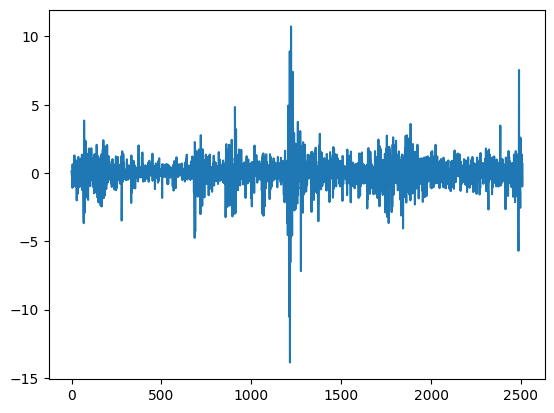

In [92]:
plt.plot(prices_diff)

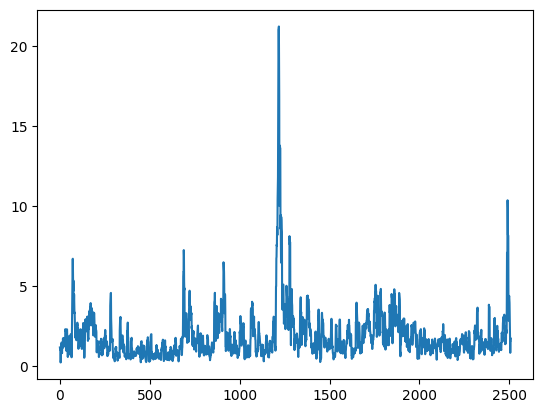

In [93]:
plt.plot(volatilities)

In [94]:
volatilities.shape

(2509,)

In [95]:
prices_diff.shape

(2509,)